In [ ]:
from zipfile import ZipFile
from pandas import *

dz = ZipFile("/content/titanic.zip")
data = read_csv(dz.open("train.csv"))
data_= data_train.copy()

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
print(data.isnull().sum())
print(data.describe())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  


In [ ]:
total_null = data.isnull().sum().sort_values(ascending = False)
percentage_null = round(((data.isnull().sum() / data.isnull().count()) * 100), 2).sort_values(ascending = False)
null_table = concat([total_null, percentage_null], axis = 1, keys = ['Total', '%'])
print(null_table)

             Total      %
Cabin          687  77.10
Age            177  19.87
Embarked         2   0.22
PassengerId      0   0.00
Survived         0   0.00
Pclass           0   0.00
Name             0   0.00
Sex              0   0.00
SibSp            0   0.00
Parch            0   0.00
Ticket           0   0.00
Fare             0   0.00


In [ ]:
#delete useless columns
data.drop(columns = ['Cabin', 'Name', 'Ticket'], axis = 1, inplace = True)
data.shape

(891, 9)

In [ ]:
#fill missing values
#median method for age
data['Age'].fillna(data['Age'].median(), inplace = True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

<ipython-input-39-43f1107bfd2a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace = True)
<ipython-input-39-43f1107bfd2a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
print(data.info())
print("----------------")
print(data['Sex'].unique())
print("----------------")
print(data['Embarked'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None
----------------
['male' 'female']
----------------
['S' 'C' 'Q']


In [ ]:
#Convert categorical values into num

#Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

#Map method
# data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
# data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

#Comprehensive method (if) for 2 unique values
# data['Sex'] = [0 if i == 'male' else 1 for i in data['Sex']]

print(data.info())
print("----------------")
print(data['Sex'].unique())
print("----------------")
print(data['Embarked'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB
None
----------------
[1 0]
----------------
[2 0 1]


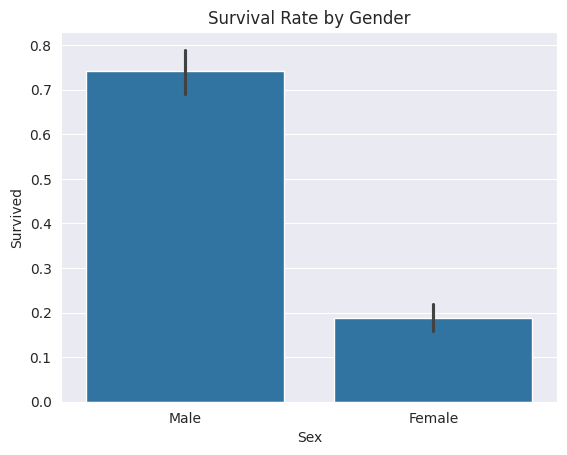

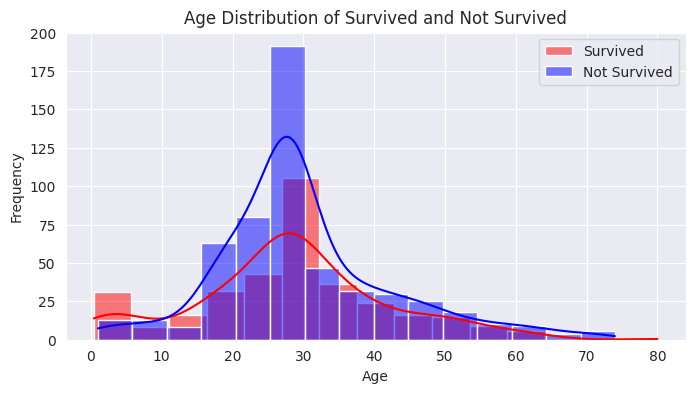

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

# Survival rate based on gender
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

# Age Distribution of Survived and Not Survived
plt.figure(figsize=(8, 4))
sns.histplot(data[data['Survived'] == 1]['Age'], kde = True, bins = 15, color = 'red', label = 'Survived')
sns.histplot(data[data['Survived'] == 0]['Age'], kde = True, bins = 15,color = 'blue', label = 'Not Survived')
plt.legend()
plt.title('Age Distribution of Survived and Not Survived')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

y = data['Survived']
x = data.drop(columns = ['Survived'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [ ]:
#build a ML model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Accuracy score before model tuning
acs = accuracy_score(pred, y_test)
print(round((acs * 100), 2))

78.21


In [ ]:
#Classification report before model tuning
cr = classification_report(pred, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       112
           1       0.69      0.76      0.72        67

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.79      0.78      0.78       179



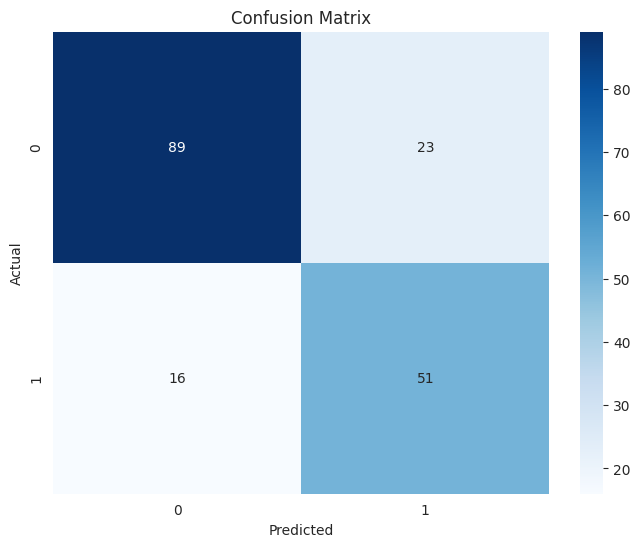

In [ ]:
#Confusion matrix before model tuning
cm = confusion_matrix(pred, y_test)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
#Model tuning
from sklearn.model_selection import GridSearchCV
params = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1]}
gr = GridSearchCV(model, param_grid = params, cv = 5, n_jobs = 1, scoring = 'accuracy', \
                  verbose = 1)
gr.fit(x_train, y_train)
print(f"Best params: {gr.best_params_}")
print(f"Best score: {gr.best_score_}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best params: {'C': 1, 'penalty': 'l2'}
Best score: 0.794907908992416


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceba

In [ ]:
#Model after tuning
modelt = LogisticRegression(C = 1, penalty = 'l2', random_state = 0, max_iter = 350)
modelt.fit(x_train, y_train)
predt = modelt.predict(x_test)

In [ ]:
#Accuracy score after model tuning
acs = accuracy_score(predt, y_test)
print(round((acs * 100), 2))

81.01


In [ ]:
#Classification report before model tuning
cr = classification_report(predt, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       112
           1       0.69      0.76      0.72        67

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.79      0.78      0.78       179



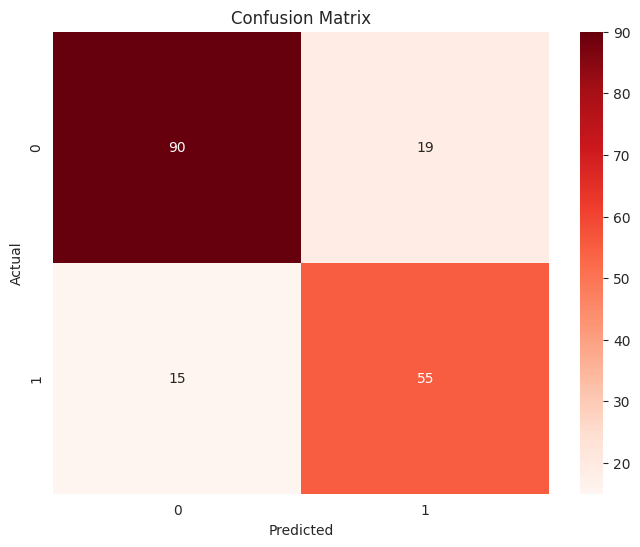

In [ ]:
#Confusion matrix before model tuning
cm = confusion_matrix(predt, y_test)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, cmap = 'Reds', fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Model accuracy improved 2.8 point after tuning, model works good, overall.